#### The dataset contains anonymous ratings(-10 to 10) provided by a total of 41,000 users. Train file contains 1.1 million ratings and in the test file the user needs to predict the ratings provided by the same set of users on a diffrent set of jokes. The complete text for all 139 jokes is also provided in a separate csv. Given the combination of user and joke, the task is to predict the rating given by that user to the joke in the test set

##### Public Private Split
##### Private split contains 60% of jokes from the test file rated by each user, while the public split contains the other 40% rated by the same user.

##### Evaluation Metric
##### The evaluation metric for this challenge is root mean squared error (RMSE)

#### Train link has ‘train.csv’ and ‘jokes.csv’
##### a. The train.csv file contains the user id, joke id and the rating

##### id: Unique id

##### user_id: ID for user

##### joke_id: ID for joke

##### Rating: Rating given by the user to the joke


##### b. The jokes.csv contains the joke text

##### joke_id: ID for joke

##### joke_text: Complete text for the joke


##### id: Unique id

##### user_id: ID for user

##### joke_id: ID for joke

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("/content/train.csv")
train

,id,user_id,joke_id,Rating
0,31030_110,31030,110,2.750
1,16144_109,16144,109,5.094
2,23098_6,23098,6,-6.438
3,14273_86,14273,86,4.406
4,18419_134,18419,134,9.375
...,...,...,...,...
1092054,9517_132,9517,132,3.156
1092055,27767_118,27767,118,-1.594
1092056,10580_81,10580,81,2.000
1092057,31007_119,31007,119,8.906


In [ ]:
joke = pd.read_csv("/content/jokes.csv")
joke

,joke_id,joke_text
0,1,Q. What's O. J. Simpson's web address? A. Slas...
1,2,How many feminists does it take to screw in a ...
2,3,Q. Did you hear about the dyslexic devil worsh...
3,4,They asked the Japanese visitor if they have e...
4,5,Q: What did the blind person say when given so...
...,...,...
134,135,"A blonde, brunette, and a red head are all lin..."
135,136,America: 8:00 - Welcome to work! 12:00 - Lunch...
136,137,It was the day of the big sale. Rumors of the ...
137,138,"Recently a teacher, a garbage collector, and a..."


In [ ]:
test = pd.read_csv("/content/test.csv")
test

,id,user_id,joke_id
0,6194_11,6194,11
1,19356_3,19356,3
2,23426_79,23426,79
3,40030_3,40030,3
4,19806_115,19806,115
...,...,...,...
537875,14333_74,14333,74
537876,25245_16,25245,16
537877,4082_9,4082,9
537878,19638_128,19638,128


In [ ]:
train['joke_text'] = train.joke_id.map(joke.set_index('joke_id')['joke_text'].to_dict())

print (train)

                id  user_id  joke_id  Rating  \
0        31030_110    31030      110   2.750   
1        16144_109    16144      109   5.094   
2          23098_6    23098        6  -6.438   
3         14273_86    14273       86   4.406   
4        18419_134    18419      134   9.375   
...            ...      ...      ...     ...   
1092054   9517_132     9517      132   3.156   
1092055  27767_118    27767      118  -1.594   
1092056   10580_81    10580       81   2.000   
1092057  31007_119    31007      119   8.906   
1092058    8420_98     8420       98  -3.344   

                                                 joke_text  
0        Judy was having trouble with her computer, so ...  
1        One day the first grade teacher was reading th...  
2        Q. What is orange and sounds like a parrot? A....  
3        Two attorneys went into a diner and ordered tw...  
4        A man is driving in the country one evening wh...  
...                                                    ..

In [ ]:
test['joke_text'] = test.joke_id.map(joke.set_index('joke_id')['joke_text'].to_dict())

print (test)

               id  user_id  joke_id  \
0         6194_11     6194       11   
1         19356_3    19356        3   
2        23426_79    23426       79   
3         40030_3    40030        3   
4       19806_115    19806      115   
...           ...      ...      ...   
537875   14333_74    14333       74   
537876   25245_16    25245       16   
537877     4082_9     4082        9   
537878  19638_128    19638      128   
537879   40665_26    40665       26   

                                                joke_text  
0       What's the difference between a used tire and ...  
1       Q. Did you hear about the dyslexic devil worsh...  
2       A radio conversation between a US naval ship a...  
3       Q. Did you hear about the dyslexic devil worsh...  
4       An American tourist goes into a restaurant in ...  
...                                                   ...  
537875  Q: What is the difference between mechanical e...  
537876  A guy walks into a bar and sits down next t

In [ ]:
train.head(5)

,id,user_id,joke_id,Rating,joke_text
0,31030_110,31030,110,2.750,"Judy was having trouble with her computer, so ..."
1,16144_109,16144,109,5.094,One day the first grade teacher was reading th...
2,23098_6,23098,6,-6.438,Q. What is orange and sounds like a parrot? A....
3,14273_86,14273,86,4.406,Two attorneys went into a diner and ordered tw...
4,18419_134,18419,134,9.375,A man is driving in the country one evening wh...


In [ ]:
test.head(5)

,id,user_id,joke_id,joke_text
0,6194_11,6194,11,What's the difference between a used tire and ...
1,19356_3,19356,3,Q. Did you hear about the dyslexic devil worsh...
2,23426_79,23426,79,A radio conversation between a US naval ship a...
3,40030_3,40030,3,Q. Did you hear about the dyslexic devil worsh...
4,19806_115,19806,115,An American tourist goes into a restaurant in ...


In [ ]:
train.isnull().sum()/train.shape[0] *100

id           0.0
user_id      0.0
joke_id      0.0
Rating       0.0
joke_text    0.0
dtype: float64

In [ ]:
test.isnull().sum()/test.shape[0] *100

id           0.0
user_id      0.0
joke_id      0.0
joke_text    0.0
dtype: float64

In [ ]:
joke.isnull().sum()/joke.shape[0] *100

joke_id      0.0
joke_text    0.0
dtype: float64

In [ ]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 2
Numerical Features in Train Set: 3


In [ ]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 2
Numerical Features in Test Set: 2


In [ ]:
train.isnull().sum()

id           0
user_id      0
joke_id      0
Rating       0
joke_text    0
dtype: int64

In [ ]:
test.isnull().sum()

id           0
user_id      0
joke_id      0
joke_text    0
dtype: int64

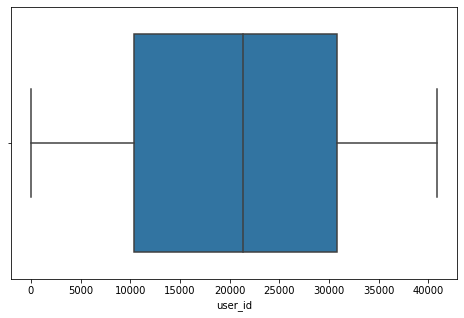

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('user_id',data=train)

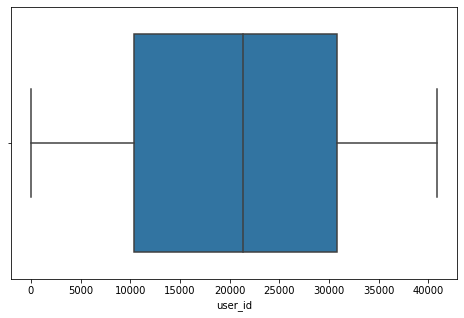

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('user_id',data=test)

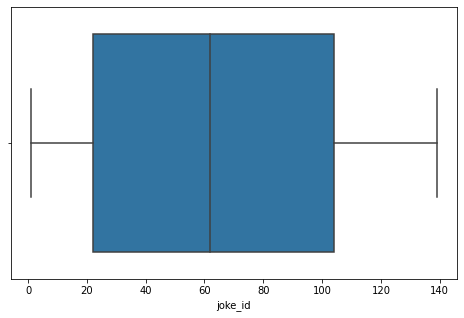

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('joke_id',data=test)

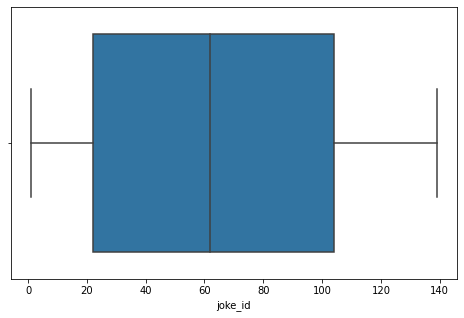

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('joke_id',data=train)

In [ ]:
train.columns

Index(['id', 'user_id', 'joke_id', 'Rating', 'joke_text'], dtype='object')

In [ ]:
train.head()

,id,user_id,joke_id,Rating,joke_text
0,31030_110,31030,110,2.750,"Judy was having trouble with her computer, so ..."
1,16144_109,16144,109,5.094,One day the first grade teacher was reading th...
2,23098_6,23098,6,-6.438,Q. What is orange and sounds like a parrot? A....
3,14273_86,14273,86,4.406,Two attorneys went into a diner and ordered tw...
4,18419_134,18419,134,9.375,A man is driving in the country one evening wh...


In [ ]:
train['user_id'].value_counts()

233      93
366      93
367      93
179      93
337      93
         ..
15409     7
34359     7
36878     7
32021     7
18942     7
Name: user_id, Length: 40863, dtype: int64

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y='id',x='Rating',data=train,palette='flag')

KeyboardInterrupt: ignored

<Figure size 720x576 with 0 Axes>

In [ ]:
# Labelencoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [ ]:
train.columns

Index(['id', 'user_id', 'joke_id', 'Rating', 'joke_text'], dtype='object')

In [ ]:
train = train.select_dtypes(exclude='object')
joke = joke.select_dtypes(exclude='object')
test = test.select_dtypes(exclude='object')

In [ ]:
# Seperate Features and Target
X= train.drop(columns = ['Rating'], axis=1)
y= train['Rating']

In [ ]:
# 60% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.6,random_state=22)

In [ ]:
# Model Building
features= X.columns
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_valid)
coef = pd.Series(LR.coef_,features).sort_values()

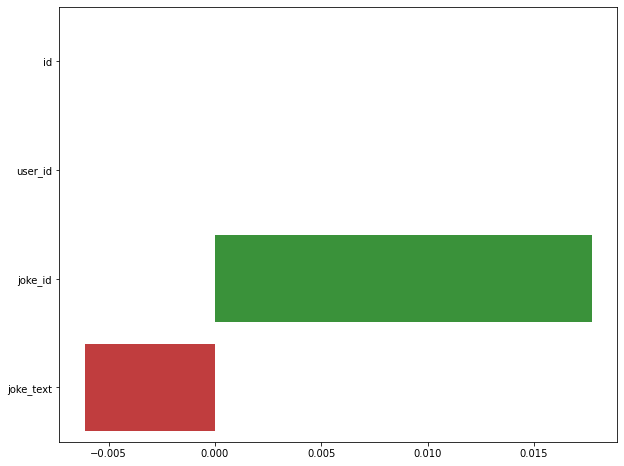

In [ ]:
# Barplot for coefficients
plt.figure(figsize=(10,8))
sns.barplot(LR.coef_,features)

In [ ]:
MSE= metrics.mean_squared_error(y_valid,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 5.154862228422778


In [ ]:
submission = pd.read_csv('/content/sample_submission_5ms57N3.csv')
final_predictions = LR.predict(test)
submission['Rating'] = final_predictions
#only positive predictions for the target variable
submission['Rating'] = submission['Rating'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('/content/my_submission.csv', index=False)